# Assignment 6

## Try to submit as an HTML file

<font size = "5">
Print your Emory ID below

In [20]:
id = 2487073
print(id)

2487073


<font size = "5">

Import the "pandas" and "matplotlib.pyplot" library

In [21]:
# Write your answer here:
import numpy as np
import matplotlib.pyplot as plt

<font size = "5">

(a) Compute function for each individual (map)

<font size = "3">

- Import the datset "data/bmi.csv"
    - **Note that the column `Height` is in $cm$, and `Weight` is in $kg$**
- Write a lambda function for $ BMI = \frac{weight (kg)}{height (m)^2} $
- Use ```list(map(...))``` to calculate $BMI$ for each row of the dataset
- Round the outcome into 2 decimal points
- Store the calculation in a new column in the dataframe called `BMI`
- Display the dataframe


In [40]:
# Write your own code here
import pandas as pd

df = pd.read_csv("data/bmi.csv")

bmi_calculator = lambda data: round(data[0] / (data[1] / 100) ** 2, 2)

bmi_values = list(map(bmi_calculator, zip(df['Weight'], df['Height'])))

bmi_rounded = [round(bmi, 2) for bmi in bmi_values]

df['BMI'] = bmi_rounded

display(df)

,Gender,Height,Weight,Index,BMI
0,Male,174,96,4,31.71
1,Male,189,87,2,24.36
2,Female,185,110,4,32.14
3,Female,195,104,3,27.35
4,Male,149,61,3,27.48
...,...,...,...,...,...
495,Female,150,153,5,68.00
496,Female,184,121,4,35.74
497,Female,141,136,5,68.41
498,Male,150,95,5,42.22


<font size = "5">
For questions (b)-(d), read "data/wdi_2020.csv" <br>

- This is a dataset containing the proportion  <br>
of urban population by country in 2020

<font size = "5">

(b) Convert to upper case

<font size = "3">

- Create the following function to convert a string to upper case

$\quad$ ``` fn_upper = lambda x: x.upper() ```

- Create a new column, "countryname_upper"  <br>
that converts "countryname" to upper case.

- Print the original `countryname` and the newly created column, like: <br>
"['Afghanistan', 'Africa Eastern and Southern', 'Africa Western and Central', 'Albania', 'Algeria', ......] "

In [43]:
# Write your own code here
df = pd.read_csv("data/wdi_2020.csv")

fn_upper = lambda x: x.upper()
df['countryname_upper'] = df['countryname'].apply(fn_upper)

print(list(df['countryname']))
print(list(df['countryname_upper']))


['Afghanistan', 'Africa Eastern and Southern', 'Africa Western and Central', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Arab World', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Caribbean small states', 'Cayman Islands', 'Central African Republic', 'Central Europe and the Baltics', 'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Early-demographic dividend', 'East Asia & Pacific', 'East Asia & Pacific (excluding high income)'

<font size = "5">

(c) Extract sorted elements from a dataset

<font size = "3">

- Sort by "prop_urbanpopulation" in ascending order
- Subset the 5 countries with the lowest urban population

In [30]:
# Write your code here

sorted_df = df.sort_values(by='prop_urbanpopulation', ascending=True)

lowest_5_countries = sorted_df[['countryname', 'prop_urbanpopulation']]
print(lowest_5_countries.iloc[:5])



     countryname  prop_urbanpopulation
31       Burundi                 4.339
162       Rwanda                 4.721
138        Nepal                 6.091
202       Uganda                 7.534
178  South Sudan                 8.519


<font size = "5">

(d) Subset elements with query

<font size = "3">

- Compute the 25 quantile value of "prop_urbanpopulation"
- Use ".query()" to subset countries with <br>
 "prop_urbanpopulation" higher the 25 quantile

**hint: Import ```numpy``` and use `np.nanpercentile`**

In [55]:
# Write your own code here


quantile_25 = np.nanpercentile(df['prop_urbanpopulation'], 25)

subset_df = df.query('prop_urbanpopulation > @quantile_25')
display(subset_df)


,year,yearcode,countryname,countrycode,prop_urbanpopulation
2,1980,YR1980,Algeria,DZA,43.542
3,1980,YR1980,American Samoa,ASM,74.330
4,1980,YR1980,Andorra,AND,92.064
6,1980,YR1980,Antigua and Barbuda,ATG,34.618
7,1980,YR1980,Argentina,ARG,82.887
...,...,...,...,...,...
428,2020,YR2020,Vietnam,VNM,37.340
429,2020,YR2020,Virgin Islands (U.S.),VIR,95.939
430,2020,YR2020,West Bank and Gaza,PSE,76.719
431,2020,YR2020,"Yemen, Rep.",YEM,37.908


<font size = "5">

(e) Plot by category

<font size = "3">

- Read "data/wdi_urban.csv"<br>
This contains data from 1980 and 2020

- Create a list with the unique values of "year"
- Create a plot with a ...
    - Histogram of "prop_urbanpopulation" <br>
    for each year
    - Set the histogram option ``` alpha = 0.5 ``` for transparency
    - All the histograms should be overlapping
    - Create a legend with the list of years
    - Label the axes and the title

What do we learn from the graph?

HINT: See the example at the end of Lecture 10


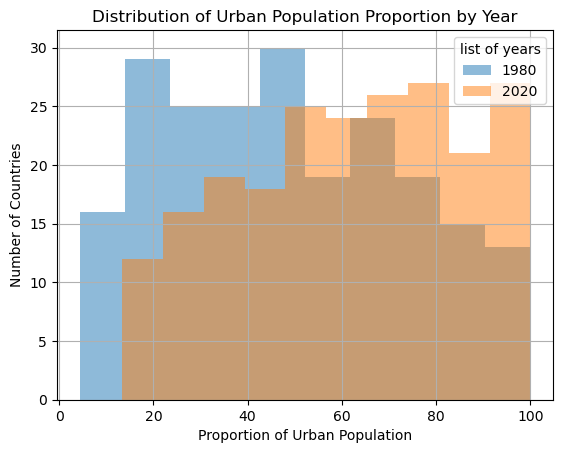

In [52]:
# Write your own code here

df = pd.read_csv("data/wdi_urban.csv")

years = df['year'].unique()


plt.figure()

for year in years:
    subset = df[df['year'] == year]
    plt.hist(subset['prop_urbanpopulation'], alpha=0.5, label=str(year))

plt.xlabel('Proportion of Urban Population')
plt.ylabel('Number of Countries')
plt.title('Distribution of Urban Population Proportion by Year')
plt.legend(title  = "list of years")
plt.grid(True)
plt.show()


What do we learn from the graph?


From the graph, we can observe the distribution of urban population proportions across countries for the two years, 1980 and 2020. We can notice a shift in the distributions between these two years, indicating a change in urbanization patterns across countries. The overlapping histograms allow us to see and identify commonalities and differences in the distributions for each year. The histogram for 2020 lean more to the right, while the histogram for 2018 lean more to the left, suggesting that more countries have higher urban population proportions in 2020 than in 1980. This shows a general trend of increasing urbanization over the 40-year period.